In [1]:
%load_ext pycodestyle_magic

%pycodestyle_on

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import FuncFormatter

In [2]:
incidentes_viales_df = pd.read_csv("../data/incidentes-viales-c5.csv")

In [3]:
def number_formatter(number, pos=None):
    """Convert a number into a human readable format."""
    magnitude = 0
    while abs(number) >= 1000:
        magnitude += 1
        number /= 1000.0
    return '%.1f%s' % (number, ['', 'K', 'M', 'B', 'T', 'Q'][magnitude])

In [ ]:
# con talacha
def numeric_profiling(df_o, col):
    """
    Profiling for numeric columns.

    :param: column to analyze
    :return: dictionary
    """
    profiling = {}

    # eliminate missing values
    df = df_o.copy()
    df = df[df[col].notna()]
    df[col] = df[col].astype(float)

    profiling.update({'max': df[col].max(),
                     'min': df[col].min(),
                     'mean': df[col].mean(),
                     'stdv': df[col].std(),
                     '25%': df[col].quantile(.25),
                     'median': df[col].median(),
                     '75%': df[col].quantile(.75),
                     'kurtosis': df[col].kurt(),
                     'skewness': df[col].skew(),
                     'uniques': df[col].nunique()}
                     # 'prop_missings': df[col].isna().sum()/df.shape[0]*100,
                     # 'top1_repeated': get_repeated_values(df, col, 1),
                     # 'top2_repeated': get_repeated_values(df, col, 2),
                     # 'top3_repeated': get_repeated_values(df, col, 3)
                     )

    return profiling

In [57]:
incidentes_viales_df.columns

Index(['folio', 'fecha_creacion', 'hora_creacion', 'dia_semana',
       'codigo_cierre', 'fecha_cierre', 'año_cierre', 'mes_cierre',
       'hora_cierre', 'delegacion_inicio', 'incidente_c4', 'latitud',
       'longitud', 'clas_con_f_alarma', 'tipo_entrada', 'delegacion_cierre',
       'geopoint', 'mes'],
      dtype='object')

In [4]:
incidentes_viales_df.codigo_cierre.mask(incidentes_viales_df.codigo_cierre ==
                                        r"(A) La unidad de atención a emergencias fue despachada, "
                                        "llegó al lugar de los hechos y confirmó la emergencia reportada",
                                        'A', inplace=True)
incidentes_viales_df.codigo_cierre.mask(incidentes_viales_df.codigo_cierre ==
                                        r'(N) La unidad de atención a emergencias fue despachada, '
                                        'llegó al lugar de los hechos, pero en el sitio del evento '
                                        'nadie solicitó el apoyo de la unidad',
                                        'N', inplace=True)
incidentes_viales_df.codigo_cierre.mask(incidentes_viales_df.codigo_cierre ==
                                        r'(D) El incidente reportado se registró en dos o más '
                                        'ocasiones procediendo a mantener un único reporte (afirmativo,'
                                        ' informativo, negativo o falso) como el identificador para el '
                                        'incidente',
                                        'D', inplace=True)
incidentes_viales_df.codigo_cierre.mask(incidentes_viales_df.codigo_cierre ==
                                        r'(F) El operador/a o despachador/a identifican, antes de dar '
                                        'respuesta a la emergencia, que ésta es falsa. O al ser '
                                        'despachada una unidad de atención a emergencias en el lugar '
                                        'de los hechos se percatan que el incidente no corresponde al '
                                        'reportado inicialmente',
                                        'F', inplace=True)
incidentes_viales_df.codigo_cierre.mask(incidentes_viales_df.codigo_cierre ==
                                        r'(I) El incidente reportado es afirmativo y se añade '
                                        'información adicional al evento',
                                        'I', inplace=True)

2:80: E501 line too long (99 > 79 characters)
3:80: E501 line too long (106 > 79 characters)
6:80: E501 line too long (99 > 79 characters)
7:80: E501 line too long (100 > 79 characters)
11:80: E501 line too long (95 > 79 characters)
12:80: E501 line too long (104 > 79 characters)
13:80: E501 line too long (104 > 79 characters)
17:80: E501 line too long (103 > 79 characters)
18:80: E501 line too long (97 > 79 characters)
19:80: E501 line too long (102 > 79 characters)
20:80: E501 line too long (103 > 79 characters)
24:80: E501 line too long (95 > 79 characters)


In [5]:
incidentes_viales_df.codigo_cierre

0          A
1          A
2          N
3          N
4          A
          ..
1383133    A
1383134    A
1383135    D
1383136    D
1383137    D
Name: codigo_cierre, Length: 1383138, dtype: object

In [6]:
def generate_label(incidentes_viales_df):
    incidentes_viales_df['label'] = np.where(
        (incidentes_viales_df.codigo_cierre == 'F') | (incidentes_viales_df.codigo_cierre == 'N'), 1, 0)

3:80: E501 line too long (104 > 79 characters)


In [7]:
generate_label(incidentes_viales_df)

In [8]:
incidentes_viales_df['label']

0          0
1          0
2          1
3          1
4          0
          ..
1383133    0
1383134    0
1383135    0
1383136    0
1383137    0
Name: label, Length: 1383138, dtype: int64

In [9]:
for column in incidentes_viales_df.columns:
    print(column, ", valores únicos: ", len(incidentes_viales_df[column].unique()))

folio , valores únicos:  1383138
fecha_creacion , valores únicos:  2637
hora_creacion , valores únicos:  105887
dia_semana , valores únicos:  7
codigo_cierre , valores únicos:  5
fecha_cierre , valores únicos:  2621
año_cierre , valores únicos:  7
mes_cierre , valores únicos:  12
hora_cierre , valores únicos:  106827
delegacion_inicio , valores únicos:  17
incidente_c4 , valores únicos:  26
latitud , valores únicos:  82502
longitud , valores únicos:  78985
clas_con_f_alarma , valores únicos:  4
tipo_entrada , valores únicos:  9
delegacion_cierre , valores únicos:  17


2:80: E501 line too long (83 > 79 characters)


geopoint , valores únicos:  134289
mes , valores únicos:  12
label , valores únicos:  2


In [10]:
incidentes_viales_df['delegacion_inicio'].unique()

array(['VENUSTIANO CARRANZA', 'CUAJIMALPA', 'TLALPAN',
       'MAGDALENA CONTRERAS', 'MIGUEL HIDALGO', 'GUSTAVO A. MADERO',
       'TLAHUAC', 'CUAUHTEMOC', 'COYOACAN', 'IZTAPALAPA', 'BENITO JUAREZ',
       'AZCAPOTZALCO', 'IZTACALCO', 'MILPA ALTA', 'ALVARO OBREGON',
       'XOCHIMILCO', nan], dtype=object)

In [11]:
for column in incidentes_viales_df.columns:
    val_nulos = incidentes_viales_df[column].isnull().sum()
    if val_nulos != 0:
        print(column, "tiene", val_nulos, "valores nulos")

delegacion_inicio tiene 158 valores nulos
latitud tiene 443 valores nulos
longitud tiene 435 valores nulos
delegacion_cierre tiene 140 valores nulos
geopoint tiene 446 valores nulos


In [12]:
incidentes_viales_df["incidente_c4"].unique()

array(['accidente-choque sin lesionados',
       'accidente-choque con lesionados',
       'lesionado-accidente automovilístico', 'accidente-volcadura',
       'lesionado-atropellado', 'accidente-otros',
       'accidente-persona atrapada / desbarrancada',
       'cadáver-accidente automovilístico', 'cadáver-atropellado',
       'accidente-motociclista', 'accidente-vehiculo desbarrancado',
       'accidente-choque con prensados', 'accidente-vehiculo atrapado',
       'accidente-ciclista', 'accidente-monopatín',
       'sismo-choque con lesionados',
       'accidente-vehículo atrapado-varado',
       'detención ciudadana-atropellado', 'accidente-ferroviario',
       'detención ciudadana-accidente automovilístico',
       'sismo-choque sin lesionados', 'sismo-persona atropellada',
       'Detención ciudadana-accidente automovilístico',
       'sismo-choque con prensados',
       'mi ciudad-calle-incidente de tránsito',
       'mi ciudad-taxi-incidente de tránsito'], dtype=object)

In [13]:
incidente_c4_falso = incidentes_viales_df.groupby("incidente_c4", as_index=False).sum()
incidente_c4_falso = incidente_c4_falso.drop(columns=['año_cierre', 'latitud', 'longitud', 'mes'], axis=1)

1:80: E501 line too long (87 > 79 characters)
2:80: E501 line too long (106 > 79 characters)


In [14]:
incidente_c4_falso.sort_values(by='label', ascending=False)

,incidente_c4,label
3,accidente-choque sin lesionados,198694
1,accidente-choque con lesionados,43678
19,lesionado-atropellado,25102
7,accidente-motociclista,7758
13,accidente-volcadura,2881
9,accidente-persona atrapada / desbarrancada,1197
18,lesionado-accidente automovilístico,884
4,accidente-ciclista,487
8,accidente-otros,461
10,accidente-vehiculo atrapado,314


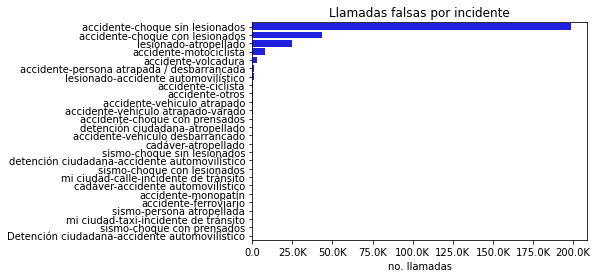

3:80: E501 line too long (82 > 79 characters)


In [23]:
ax = sns.barplot(x="label",
                 y="incidente_c4",
                 data=incidente_c4_falso.sort_values(by='label', ascending=False),
                 color="b")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.xaxis.set_major_formatter(FuncFormatter(number_formatter))
ax.set(title="Llamadas falsas por incidente",
       xlabel="no. llamadas",
       ylabel="")
plt.show()

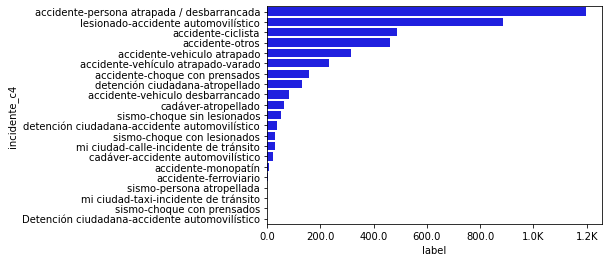

3:80: E501 line too long (91 > 79 characters)


In [24]:
ax = sns.barplot(x="label",
                 y="incidente_c4",
                 data=incidente_c4_falso.sort_values(by='label', ascending=False).tail(-5),
                 color="b")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.xaxis.set_major_formatter(FuncFormatter(number_formatter))

In [25]:
incidente_c4_falso_anio = incidentes_viales_df.groupby(["año_cierre", "incidente_c4"], as_index=False).sum()
incidente_c4_falso_anio = incidente_c4_falso_anio.drop(columns=['latitud', 'longitud', 'mes'], axis=1)

1:80: E501 line too long (108 > 79 characters)
2:80: E501 line too long (102 > 79 characters)


In [26]:
incidente_c4_falso_anio

,año_cierre,incidente_c4,label
0,2014,accidente-choque con lesionados,4681
1,2014,accidente-choque sin lesionados,18818
2,2014,accidente-ferroviario,0
3,2014,accidente-otros,68
4,2014,accidente-persona atrapada / desbarrancada,121
...,...,...,...
107,2020,lesionado-atropellado,1945
108,2020,mi ciudad-calle-incidente de tránsito,28
109,2020,mi ciudad-taxi-incidente de tránsito,1
110,2020,sismo-choque con lesionados,9


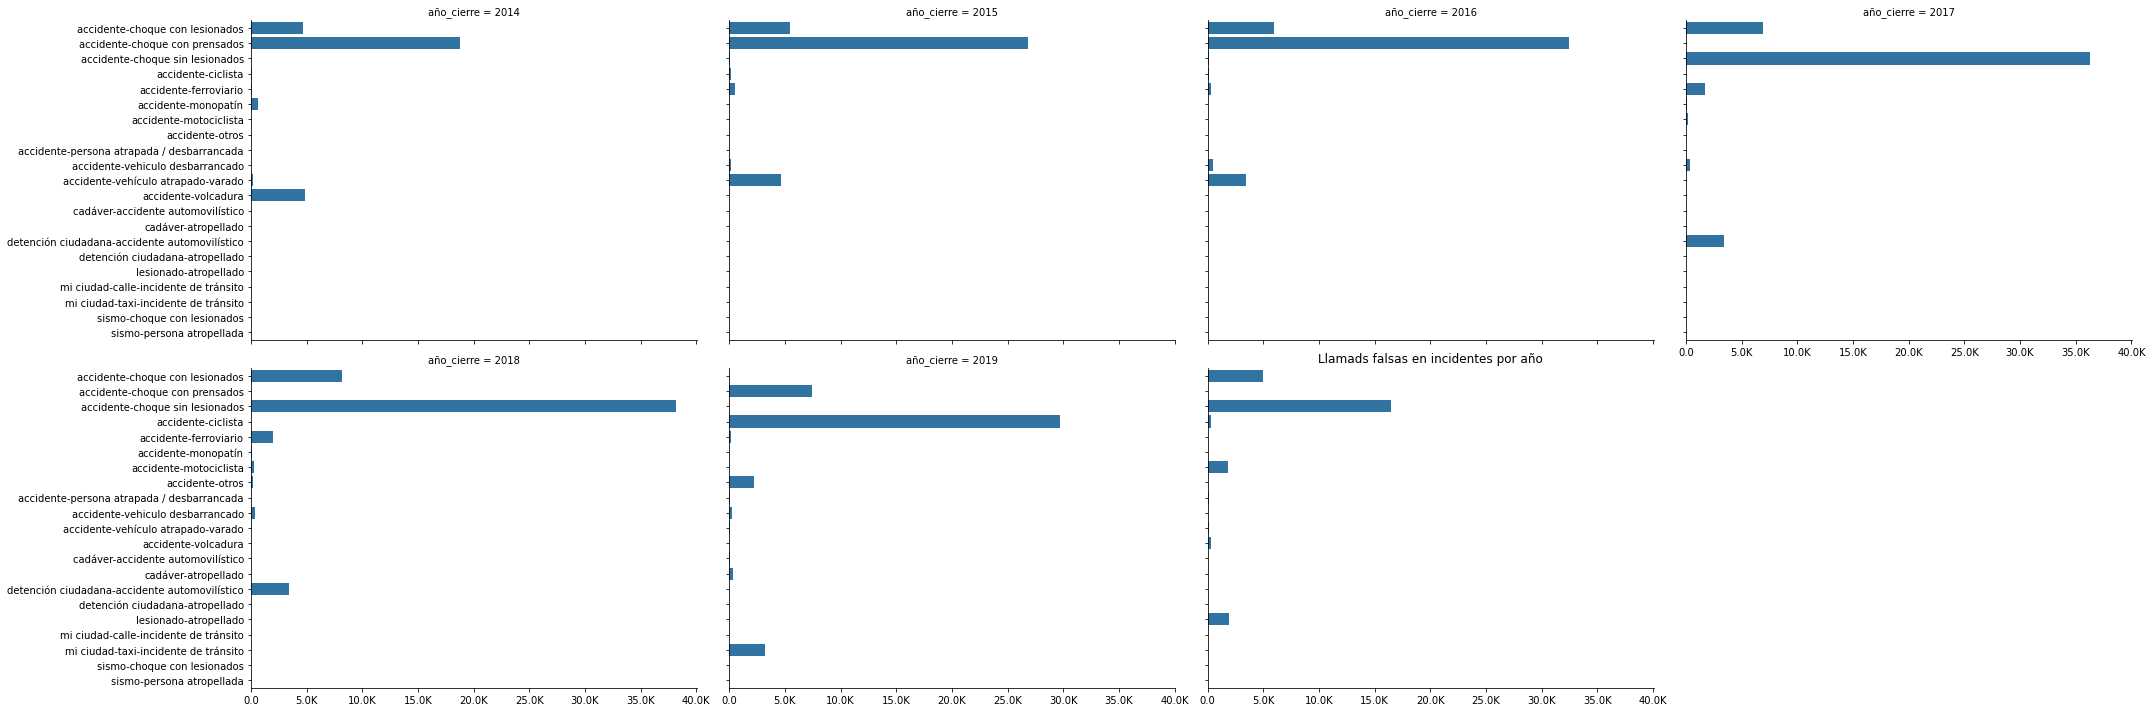

In [34]:
p = sns.FacetGrid(incidente_c4_falso_anio,
                  col="año_cierre",
                  col_wrap=4,
                  sharex=True,
                  sharey=True,
                  aspect=1.5,
                  legend_out=True,
                  height=5)
p.map_dataframe(sns.barplot, y="incidente_c4", x="label")
for ax in p.axes.flat:
    for label in ax.get_yticklabels():
        ax.xaxis.set_major_formatter(FuncFormatter(number_formatter))
p.tight_layout()
plt.title("Llamadas falsas en incidentes por año")
plt.show()

In [ ]:
# Antes de hacer el drop de geopoint, asegurarse que estan bien en latitud y longitud.

# Mes contra mes_cierre antes de hacer drop a 

# tiempo de hora de creación a cierre

# Delegación vs tipo_entrada en proporción 

# Romper en años

# 

In [46]:
class_incidente_falso_anio = incidentes_viales_df.groupby(["clas_con_f_alarma", "incidente_c4"], 
                                                          as_index=False)

1:80: E501 line too long (96 > 79 characters)


In [59]:
class_incidente_falso_anio = class_incidente_falso_anio.count()\
 .drop(columns=['fecha_creacion', 'hora_creacion', 'hora_creacion',
                'dia_semana', 'codigo_cierre', 'fecha_cierre',
                'año_cierre', 'mes_cierre', 'hora_cierre',
                'delegacion_inicio', 'latitud', 'longitud',
                'tipo_entrada', 'delegacion_cierre',
                'geopoint', 'mes', 'label'], axis=1)\
 .rename(columns={'folio':'total_llamadas'})

class_incidente_falso_anio

,clas_con_f_alarma,incidente_c4,total_llamadas
0,DELITO,Detención ciudadana-accidente automovilístico,3
1,DELITO,detención ciudadana-accidente automovilístico,151
2,DELITO,detención ciudadana-atropellado,698
3,EMERGENCIA,accidente-choque sin lesionados,752822
4,EMERGENCIA,accidente-ferroviario,53
5,EMERGENCIA,accidente-otros,2441
6,EMERGENCIA,accidente-persona atrapada / desbarrancada,5567
7,EMERGENCIA,accidente-vehiculo atrapado,1112
8,EMERGENCIA,accidente-vehiculo desbarrancado,487
9,EMERGENCIA,accidente-vehículo atrapado-varado,849


ValueError: too many values to unpack (expected 3)

In [65]:
class_incidente_falso = class_incidente_falso_anio.groupby(['clas_con_f_alarma'], as_index=False)\
 .sum()\
 .sort_values('total_llamadas', ascending=False)

class_incidente_falso

,clas_con_f_alarma,total_llamadas
1,EMERGENCIA,799037
3,URGENCIAS MEDICAS,572619
2,FALSA ALARMA,10630
0,DELITO,852


1:80: E501 line too long (98 > 79 characters)


[Text(0.5, 1.0, 'Llamadas falsas por clasificación'), Text(0, 0.5, '')]

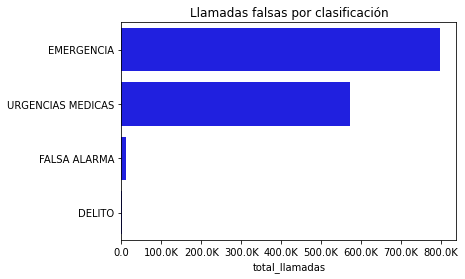

In [67]:
ax = sns.barplot(x="total_llamadas",
                 y="clas_con_f_alarma",
                 data=class_incidente_falso,
                 color="b")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.xaxis.set_major_formatter(FuncFormatter(number_formatter))
ax.set(title="Llamadas falsas por clasificación",
       ylabel="")

In [71]:
class_incidente_falso_anio = incidentes_viales_df.groupby(["clas_con_f_alarma", "año_cierre"],
                                                          as_index=False)

1:80: E501 line too long (94 > 79 characters)


In [72]:
class_incidente_falso_anio = class_incidente_falso_anio.count()\
 .drop(columns=['fecha_creacion', 'hora_creacion', 'hora_creacion',
                'dia_semana', 'codigo_cierre', 'fecha_cierre',
                'mes_cierre', 'hora_cierre',
                'delegacion_inicio', 'latitud', 'longitud',
                'tipo_entrada', 'delegacion_cierre',
                'geopoint', 'mes', 'label', 'incidente_c4'], axis=1)\
 .rename(columns={'folio':'total_llamadas'})

class_incidente_falso_anio

,clas_con_f_alarma,año_cierre,total_llamadas
0,DELITO,2014,83
1,DELITO,2015,81
2,DELITO,2016,80
3,DELITO,2017,129
4,DELITO,2018,185
5,DELITO,2019,159
6,DELITO,2020,135
7,EMERGENCIA,2014,106952
8,EMERGENCIA,2015,116703
9,EMERGENCIA,2016,118721


ValueError: too many values to unpack (expected 3)

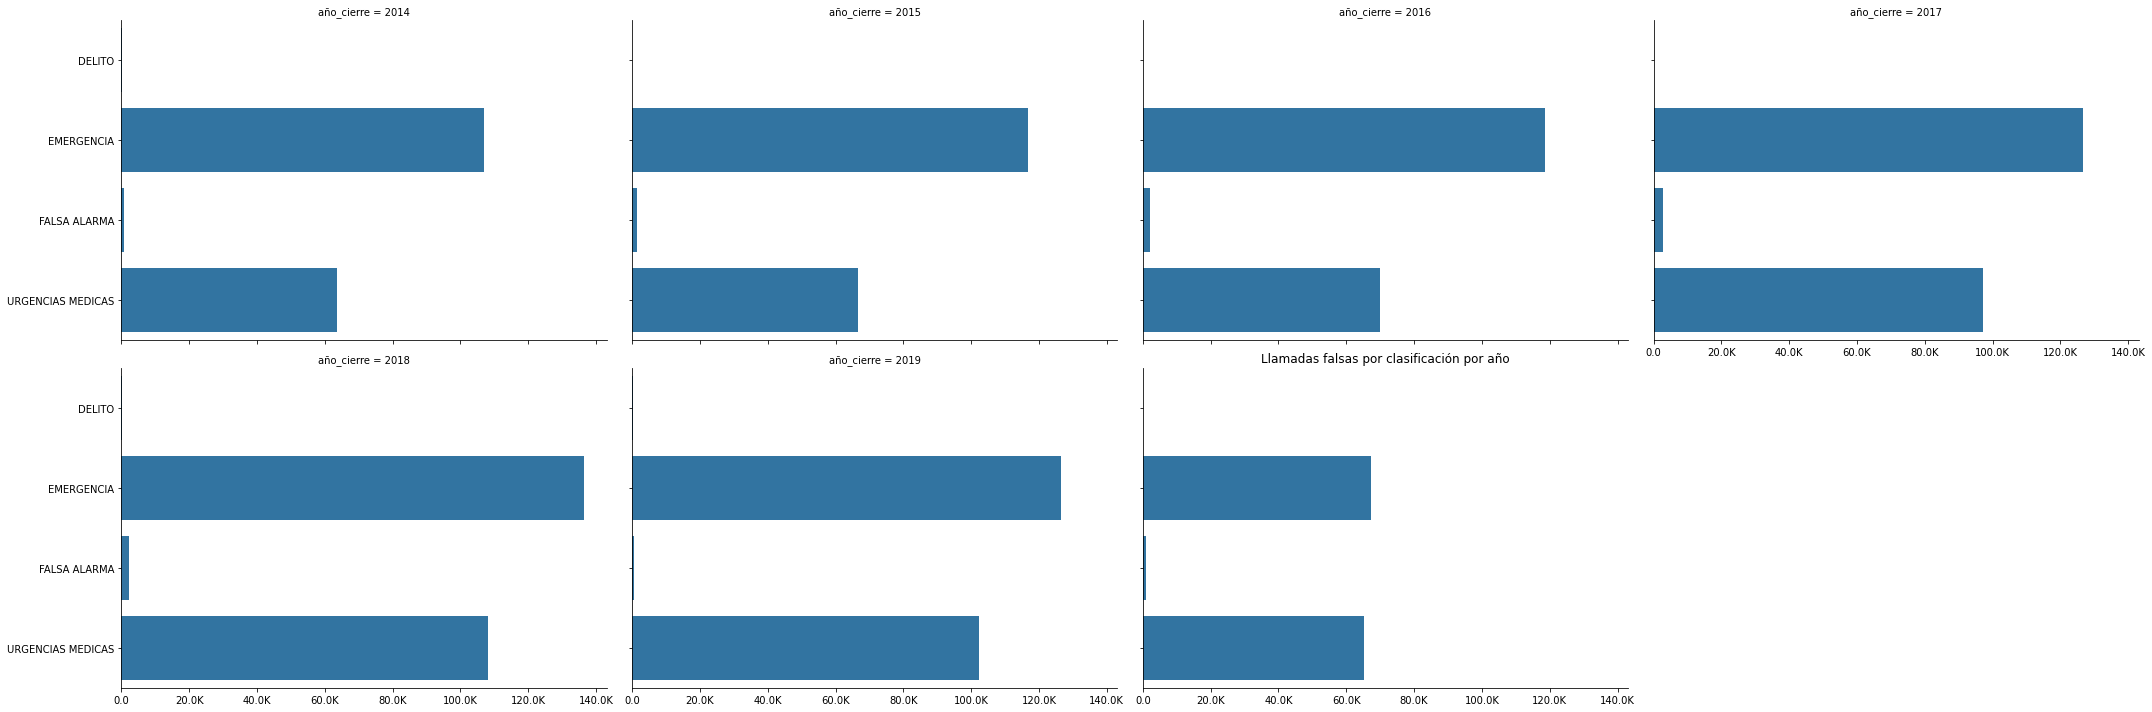

In [73]:
p = sns.FacetGrid(class_incidente_falso_anio,
                  col="año_cierre",
                  col_wrap=4,
                  sharex=True,
                  sharey=True,
                  aspect=1.5,
                  legend_out=True,
                  height=5)
p.map_dataframe(sns.barplot, y="clas_con_f_alarma", x="total_llamadas")
for ax in p.axes.flat:
    for label in ax.get_yticklabels():
        ax.xaxis.set_major_formatter(FuncFormatter(number_formatter))
p.tight_layout()
plt.title("Llamadas falsas por clasificación por año")
plt.show()